# Evaluation Project 2 HR Analytics Project- Understanding the Attrition in HR
By: TRISHA ROY

Batch: DSNB1022

Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics:
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization  in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR:
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies:
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

Note: You can find the dataset in the link below.

Downlaod Files:

https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\TRISHA ROY\Downloads\ibm-hr-analytics-employee-attrition-performance (1)\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Comment:
1. There are no missing values in our dataset
2. 1470 rows and 35 columns.
3. Out of 35 we have 9 features with Object datatypes and rest are int64 types
4. Among all Numeric Variables 'Education','EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' are ordinal variable. Unique range of all these ordinal Variable need to check.
7. Attrition is the target variable.

# Unique value check

In [7]:
df.Education.unique() 

array([2, 1, 4, 3, 5], dtype=int64)

In [8]:
df.EnvironmentSatisfaction.unique() 

array([2, 3, 4, 1], dtype=int64)

In [9]:
df.JobInvolvement.unique() 

array([3, 2, 4, 1], dtype=int64)

In [10]:
df.JobSatisfaction.unique() 

array([4, 2, 3, 1], dtype=int64)

In [11]:
df.PerformanceRating.unique() 

array([3, 4], dtype=int64)

In [12]:
df.RelationshipSatisfaction.unique() 

array([1, 4, 2, 3], dtype=int64)

In [13]:
df.WorkLifeBalance.unique() 

array([1, 3, 2, 4], dtype=int64)

These Ordinal features come with the following label encoding:

1. Education: 1- 'Below College' , 2 -'College', 3 -'Bachelor', 4- 'Master' ,5 -'Doctor'
2. EnvironmentSatisfaction: 1- 'Low', 2- 'Medium', 3 -'High', 4- 'Very High'
3. JobInvolvement: 1 -'Low', 2- 'Medium', 3- 'High', 4- 'Very High'
4. JobSatisfaction: 1- 'Low', 2- 'Medium', 3- 'High', 4 -'Very High'
5. PerformanceRating: 1- 'Low', 2- 'Average', 3 -'Good', 4- 'Excellent', 5- 'Outstanding'
6. RelationshipSatisfaction: 1- 'Low', 2- 'Medium', 3- 'High', 4- 'Very High'
7. WorkLifeBalance: 1- 'Bad', 2- 'Good', 3- 'Better', 4- 'Best'

In [14]:
df.duplicated().sum()

0

Comment- No duplicate value is found

# Statistical analysis

In [15]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Comment :
1. Minimum Empolyee Age is 18 and Maximum age of employee 60.
2. Average distance from home is 9.1 KM. It means that most of employee travel atleast 18 KM in day from home to office.
3. On Average performance Rating of employees is 3.163 with min value 3.0. This Means that performance of most of employee is 'Good'.This implies that Attrition of Employee with 'Outstanding' or 5 rating need to investigate.
4. 50% of Employees has worked atleast 2 companies previously.
5. For Monthly Income,Monthly Rate by looking at 50% and max column we can say outliers exist in this feature.
6. By looking at Mean and Median we see that some of the features are skew in nature.
7. For ordinal features statstical terminology of mean, median, std deviation doesnot make sense.
8. StandardHours and EmployeeCount contain same value for all stastical parameter. It means they contain one unique value.

In [16]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

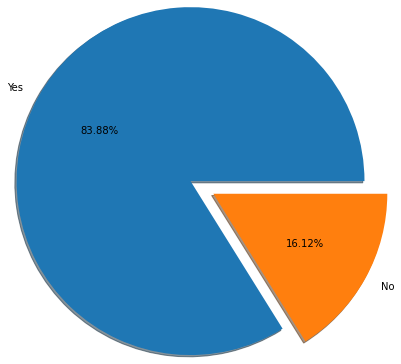

In [17]:
labels = 'Yes','No',
fig, ax = plt.subplots()
ax.pie(df['Attrition'].value_counts(),labels = labels,radius =2,autopct = '%2.2f%%',explode=[0.1,0.2], shadow=True,)
plt.show()

Comment:
1. 83.88% (1237 employees) Employees did not leave the organization while 16.12% (237 employees) did leave the organization making our dataset to be considered imbalanced since more people stay in the organization than they actually leave.

# Start with Enlisting Value counts & Sub-categories of different categorial features available

In [18]:
Category=['Attrition', 'BusinessTravel', 'Department', 'EducationField',
          'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime' ]
for i in Category:
    print(i)
    print(df[i].value_counts())
    print("="*100)
    

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender
Male      882
Female    588
Name: Gender, dtype: int64
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
MaritalStatus
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtyp

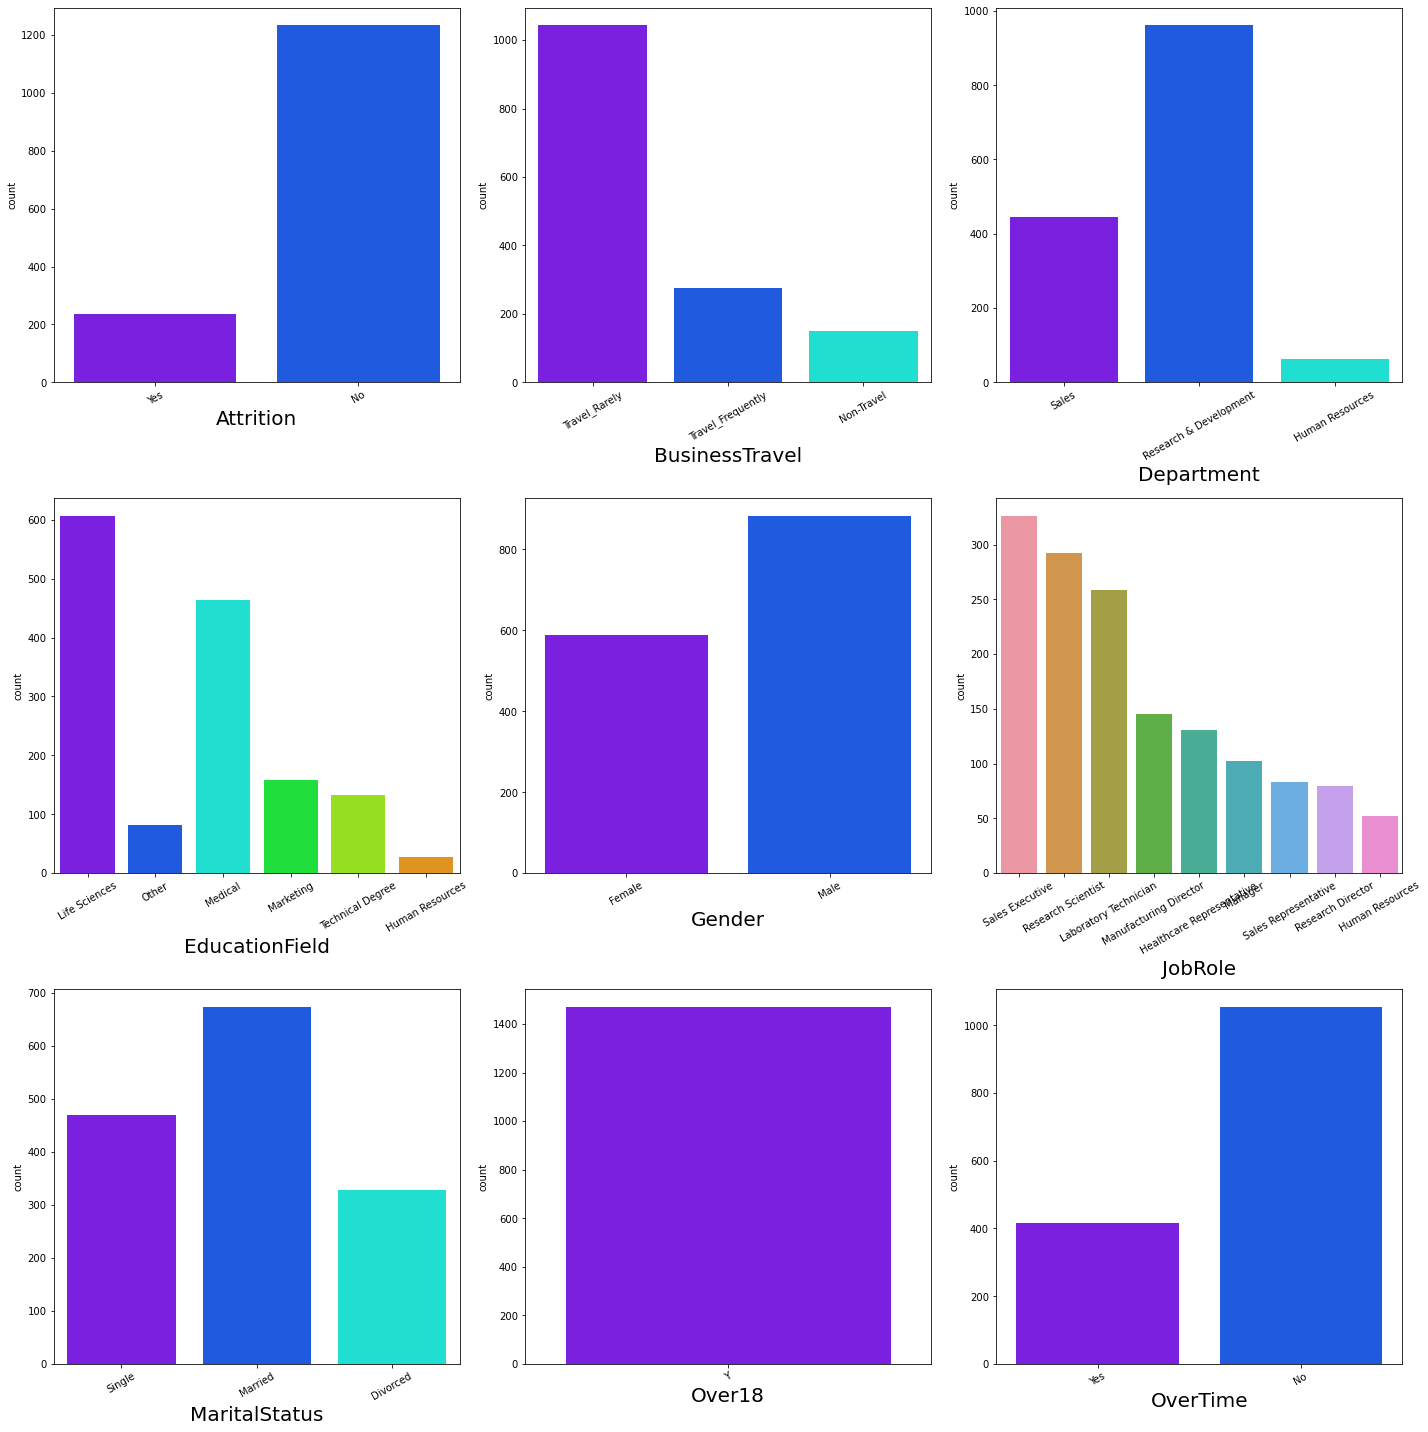

In [19]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
Category=['Attrition', 'BusinessTravel', 'Department', 'EducationField',
          'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime' ]
for i in Category:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()

# Enlisting Value counts & Sub-categories of different Ordinal features available

In [20]:
Ordinal=['Education','EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction',
          'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' ]
for i in Ordinal:
    print(i)
    print(df[i].value_counts())
    print("="*100)

Education
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64
EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64
JobInvolvement
3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64
JobSatisfaction
4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64
RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64
PerformanceRating
3    1244
4     226
Name: PerformanceRating, dtype: int64
WorkLifeBalance
3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


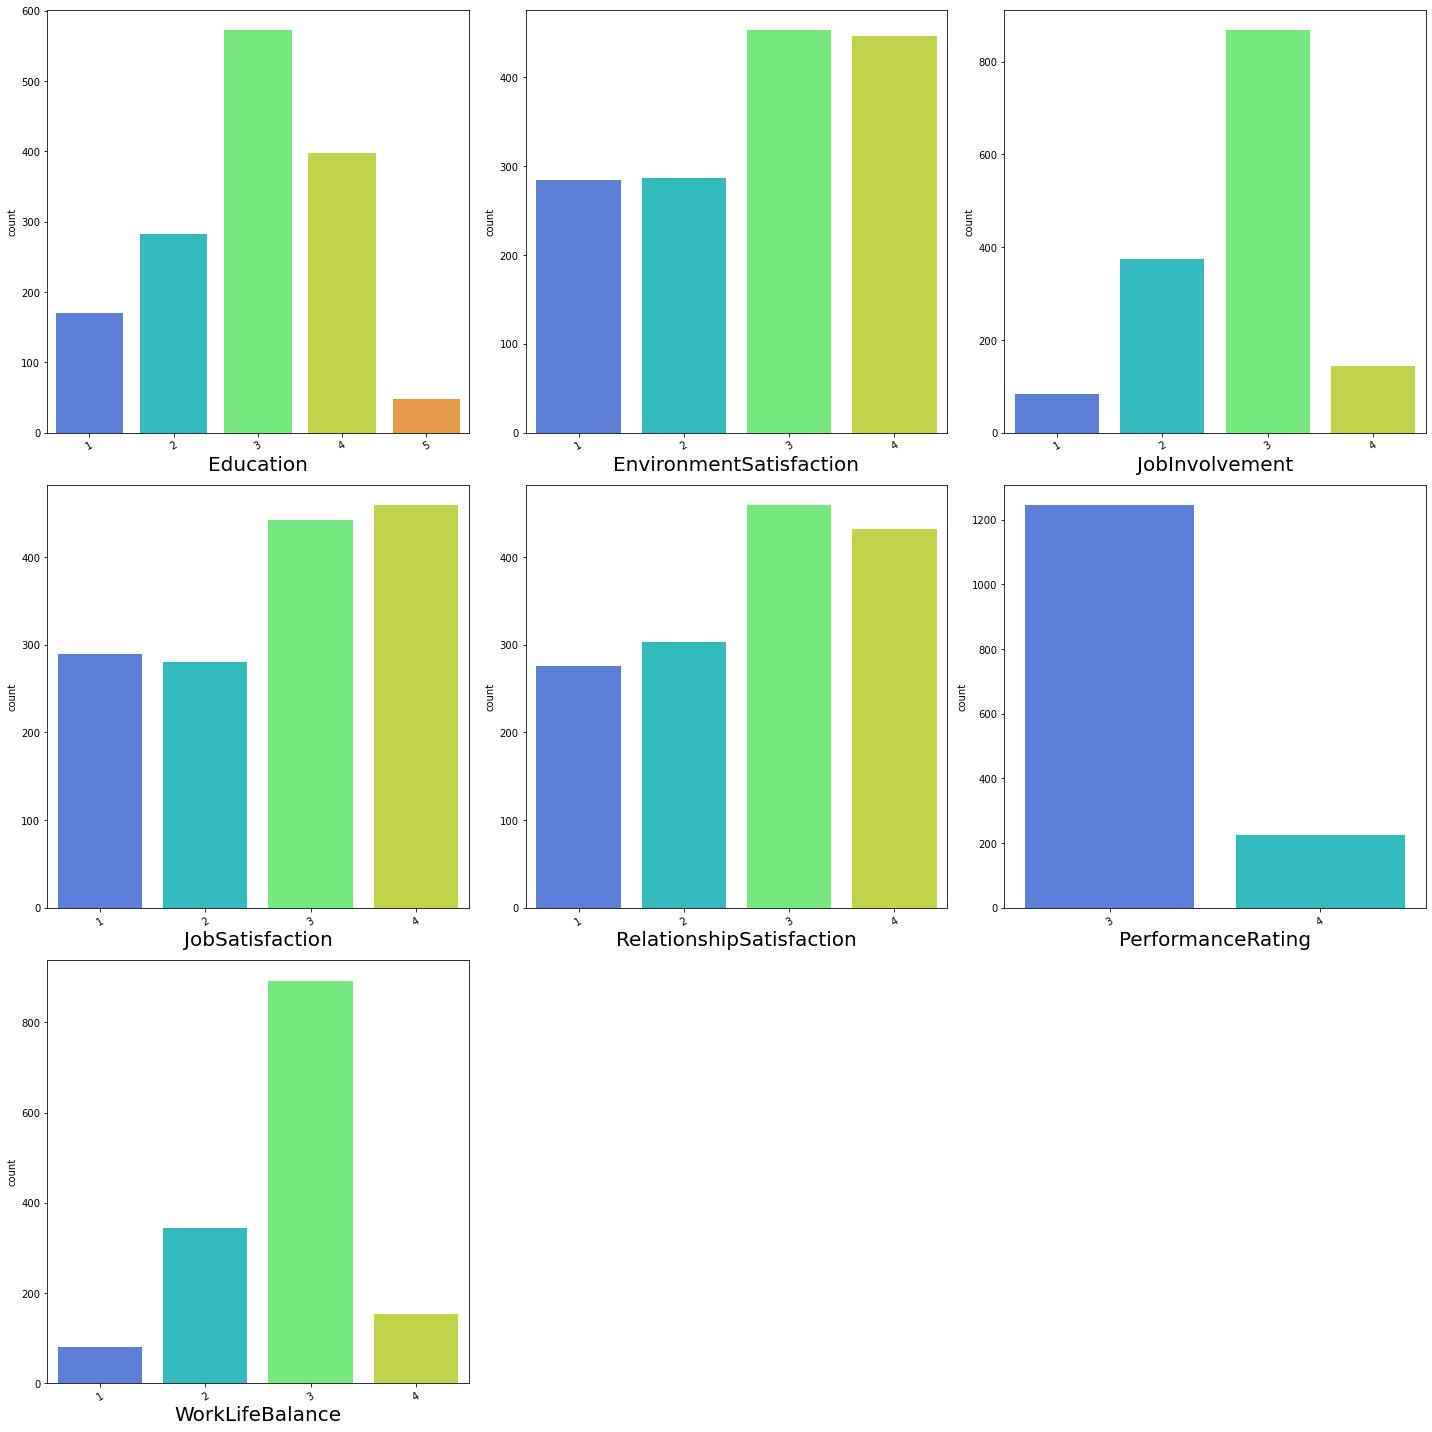

In [21]:
sns.set_palette('turbo')
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
Ordinal=['Education','EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction',
          'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' ]
for i in Ordinal:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()


# Education level of Man power available

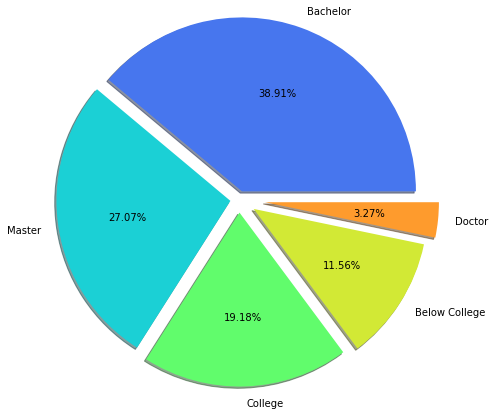

In [22]:
labels='Bachelor','Master','College','Below College','Doctor'
fig, ax = plt.subplots()
ax.pie(df['Education'].value_counts(),labels = labels,radius =2,autopct = '%3.2f%%',explode=[0.1,0.1,0.15,0.2,0.3], shadow=True,)
plt.show()

Comment:
1. More than 60 % employees educated at Masters & Bachelor. It interesting to find out in which department need this human resources.
2. 30 % of Employees are highly educated which involves master and doctor degree.
3. 39 % of Employees are graduate.
4. Almost 19% Employees are educated upto college & 12% are below college.

# Lets try to gain insight on to which department this Human Resource belong and education need of each department through visualization.

In [23]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

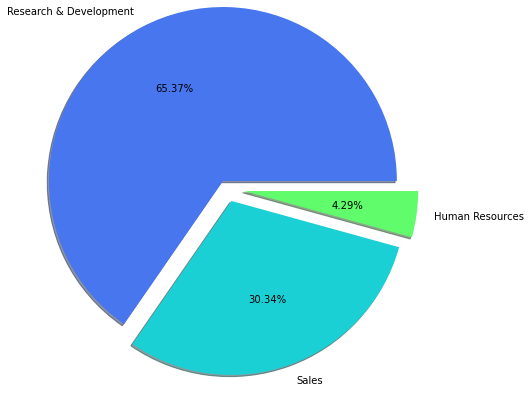

In [24]:
labels ='Research & Development','Sales','Human Resources'
fig,ax= plt.subplots()
ax.pie(df['Department'].value_counts(),labels=labels, radius=2,autopct= '%3.2f%%',explode=[0.1,0.15,0.2],shadow=True)
plt.show()


In [25]:
pd.crosstab([df.Education],[df.Department], margins=True).style.background_gradient(cmap='summer_r')


Department,Human Resources,Research & Development,Sales,All
Education,,,,
1,5,115,50,170
2,13,182,87,282
3,27,379,166,572
4,15,255,128,398
5,3,30,15,48
All,63,961,446,1470


Comment :
1. 65.37% of Employees belong to Research & Development Department. Out of Total 961 Employee no of employee educated at Bachelors,Masters, Doctor are 379,255 and 30 respectively.
2. Only 63 Employee work in HR department.

In [26]:
pd.crosstab([df.Education],[df.Department,df.Attrition], margins=True).style.background_gradient(cmap='summer_r')

# Employee distribution as per education field and level of education

In [27]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

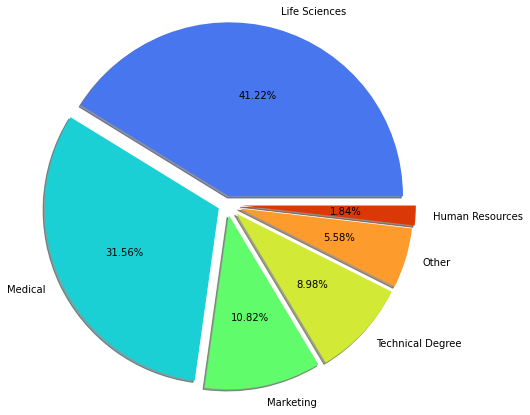

In [28]:
labels ='Life Sciences','Medical','Marketing','Technical Degree','Other','Human Resources'
fig,ax= plt.subplots()
ax.pie(df['EducationField'].value_counts(),labels=labels, radius=2,autopct= '%3.2f%%',explode=[0.1,0.1,0.125,0.15,0.15,0.175],shadow=True)
plt.show()

In [29]:
# Let check distribution of education Vs education Field
pd.crosstab([df.Education],[df.EducationField], margins=True).style.background_gradient(cmap='summer_r')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Education,,,,,,,
1,2,67,14,63,5,19,170
2,2,116,24,99,19,22,282
3,16,233,59,183,24,57,572
4,5,173,52,104,33,31,398
5,2,17,10,15,1,3,48
All,27,606,159,464,82,132,1470


In [30]:
# Let check distribution of department Vs education Field
pd.crosstab([df.Department],[df.EducationField], margins=True).style.background_gradient(cmap='summer_r')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Department,,,,,,,
Human Resources,27,16,0,13,3,4,63
Research & Development,0,440,0,363,64,94,961
Sales,0,150,159,88,15,34,446
All,27,606,159,464,82,132,1470


Comment:
1. 41.22 % Employee comes from Life science background followed by Medical profession with 31.56%.
2. There are only 27 people with HR background and We know that 63 people work in HR Department from previous result. This implies that atleast half employee working in HR department do not have HR background. This important as there is more probability of Employees Retention is when they are working in domain of interest or as per their education background. Dissatisfaction with want we doing can be seen as major reason of leaving job.
3. Most of Employees with Techanical degree are Bachelors.
4. Most of Employees having Masters and Doctors belong to Life Science and Medical domain.
5. R&D department almost everyone comes from profession or technical background except support staff. Factor like Salary Hike, travelling, overtime and Job level are things need to taken in consideration while analysing Attrition of this category.
6. There are 159 Employee with Marketing background and all work in Sales Department.
7. 50% Employees in sales department have background of Life sciences & Medical. So it will interesting to see attrition rate in these employees.

# Lets work with Job Role

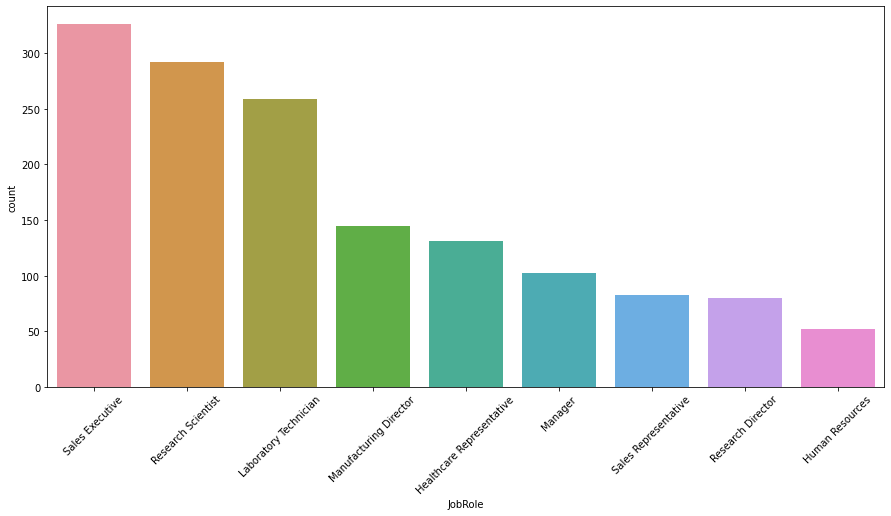

In [31]:
plt.figure(figsize=(15,7))
sns.countplot(df['JobRole'])
plt.xticks(rotation=45)
plt.show()

In [32]:
#jobrole vs dept
pd.crosstab([df.JobRole],[df.Department], margins=True).style.background_gradient(cmap='gist_rainbow_r')

Department,Human Resources,Research & Development,Sales,All
JobRole,,,,
Healthcare Representative,0,131,0,131
Human Resources,52,0,0,52
Laboratory Technician,0,259,0,259
Manager,11,54,37,102
Manufacturing Director,0,145,0,145
Research Director,0,80,0,80
Research Scientist,0,292,0,292
Sales Executive,0,0,326,326
Sales Representative,0,0,83,83


Comment:
1. There are 3 job role in HR Department, maximum of which are sales Executive with 446 Total Employees.
2. Human Resources department has 2 Job role i.e. HR & Manager.
3. There 6 different Job role in R&D department with total 961 employees and until now we know that all of them belong to thier respective domain background.


<Figure size 864x720 with 0 Axes>

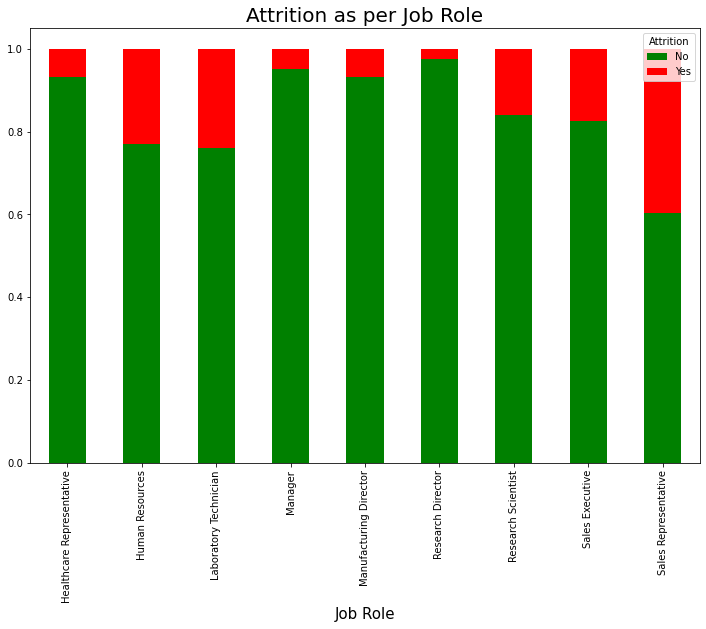

In [33]:
plt.figure(figsize=(12,10))
data=pd.crosstab(df['JobRole'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, 
                    color=['green', 'red'],figsize=(12,8))
plt.title('Attrition as per Job Role', fontsize=20)
plt.xlabel('Job Role',fontsize=15)
plt.show()

In [34]:
pd.crosstab([df.JobRole,df.Department],[df.Attrition], margins=True).style.background_gradient(cmap='gist_rainbow_r')

Comment:
1. Percentage of attrition is high in Sales Representative,Laboratory Technician,Human Resources. This all job role comes at bottom in corparate hierachy also Salary is comparatively less compare to other job role.
2. Monthly Income, Job stastifation, travelling are feature need to dive into for further insights in these job role.
3. At the Top chart 62 Laboratory Technician has resign from job, followed by 57 sales executive and 47 Research Scientist.
4. 16 % arttrition rate for Research Scientist, which involve huge investment from company. Company not only loses employee but its knowledge base, expertise & Intellatual property rights in some cases.

In [35]:
# Grouping Numeric Features
Numeric=['Age', 'DailyRate', 'DistanceFromHome',  
 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Violinplot of Numeric Variables

In [36]:
# Grouping Numeric Features
Numeric_int=['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate','MonthlyIncome', 'MonthlyRate', 
             'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears','TrainingTimesLastYear',
             'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

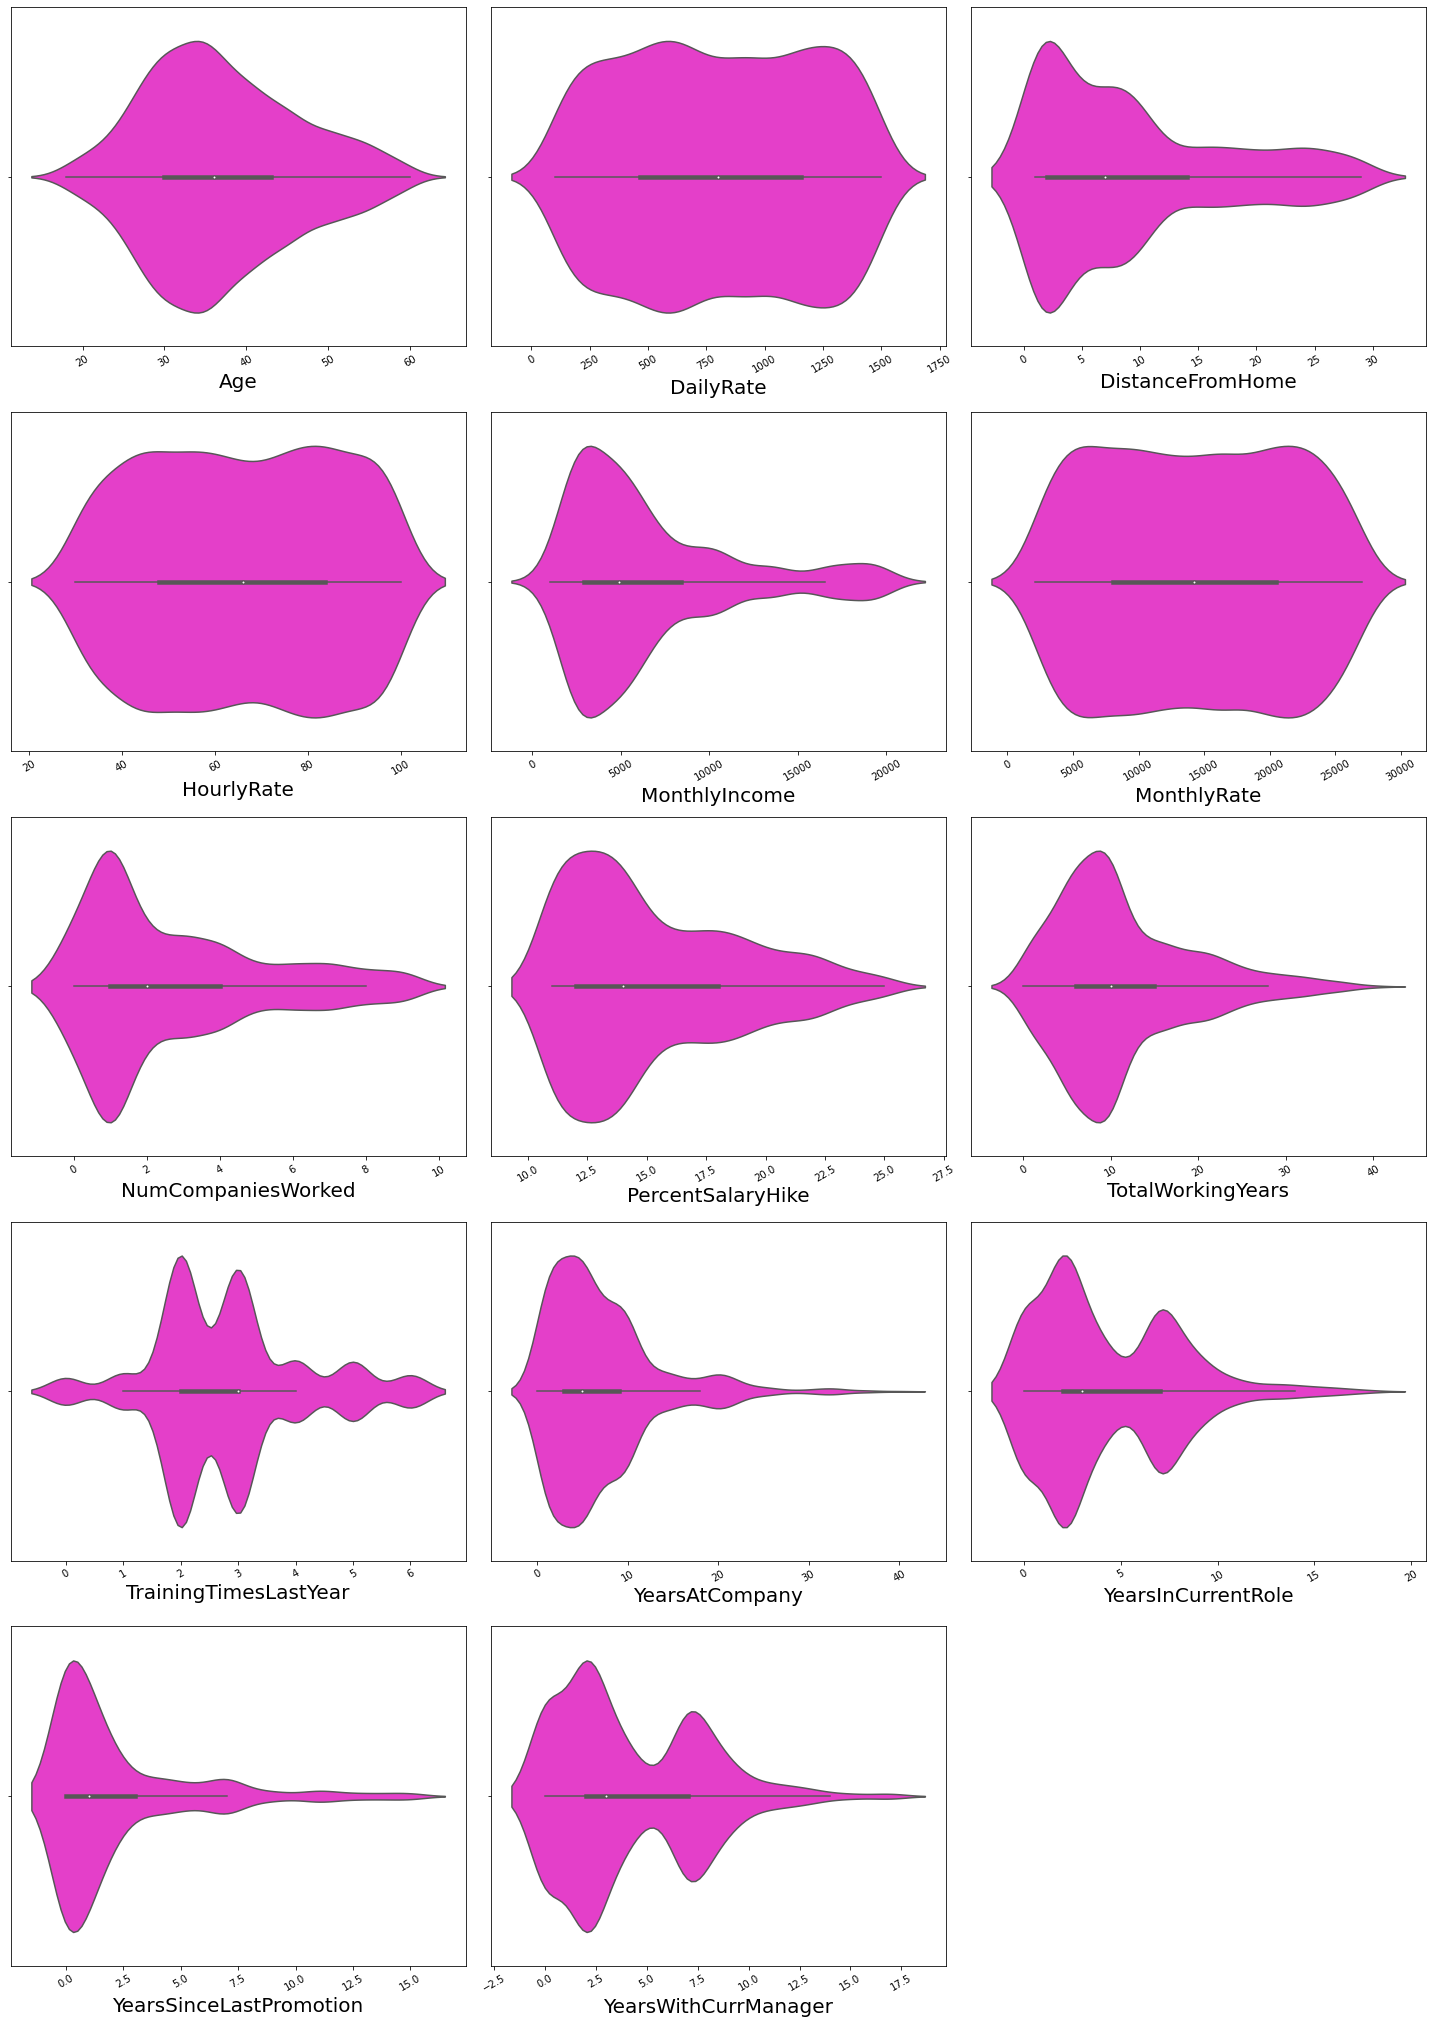

In [37]:
sns.set_palette('spring')
plt.figure(figsize=(20,50), facecolor='white')
plotnumber =1

for i in Numeric_int:
    if plotnumber <=25:
        ax = plt.subplot(9,3,plotnumber)
        sns.violinplot(df[i])
        plt.xlabel(i,fontsize=20)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()


Comment:
1. For Majority of people have spend 3 to 10 years at company.
2. Most of people staying company upto 2 years after promotion.
3. Majority of people  are train 2-3 times in last year.If employees leaves job then it loss investment for company.
4. Majority of people stay in same role for maximum 4 yrs.
5. Majority of Employees have salary hike of 10 to 15%.

# Age Vs Attrition

<AxesSubplot:xlabel='Age', ylabel='count'>

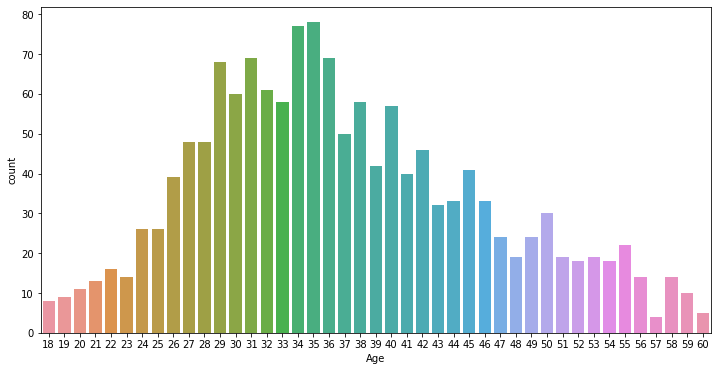

In [38]:
plt.subplots(figsize=(12,6))
sns.countplot(df['Age'])

<AxesSubplot:xlabel='Age', ylabel='count'>

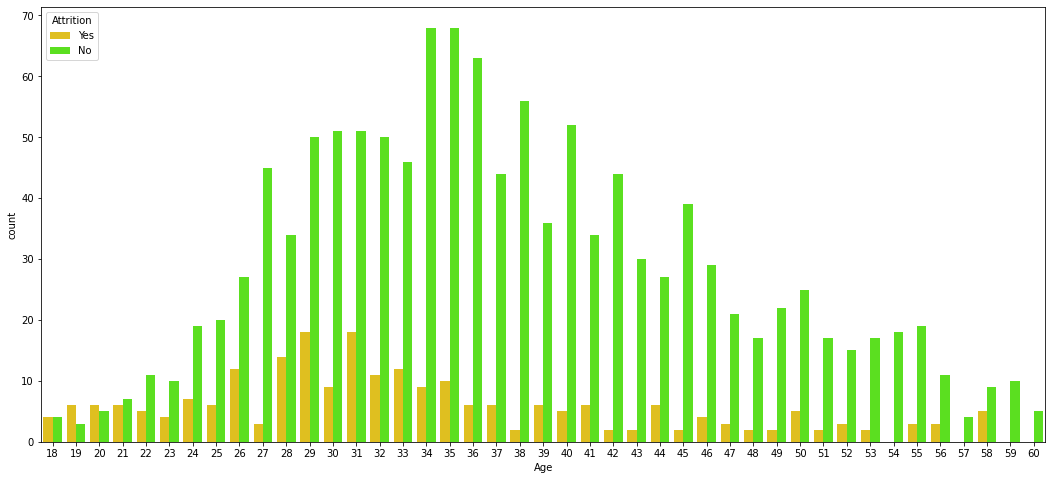

In [39]:
sns.set_palette('hsv')
plt.subplots(figsize=(18,8))
sns.countplot(x='Age', hue='Attrition', data=df)

Comment:
1. The Attrition rate is minimum between the Age years of 34 and 35.
2. The Attrition rate is maximum between the Age years of 29 and 31.

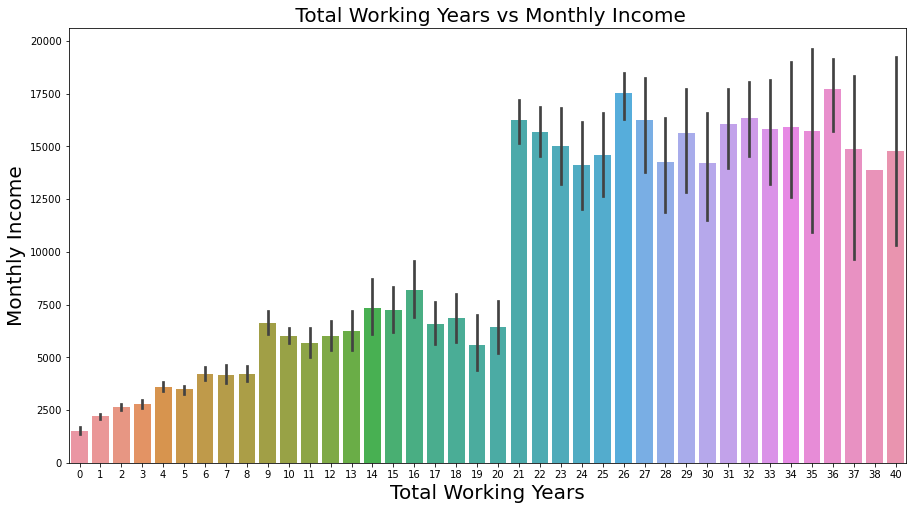

In [40]:
plt.figure(figsize=(15,8))
sns.barplot(df['TotalWorkingYears'],df['MonthlyIncome'])
plt.xlabel('Total Working Years',fontsize=20)
plt.ylabel('Monthly Income',fontsize=20)
plt.title(" Total Working Years vs Monthly Income", fontsize=20)
plt.show()

Comment:
1. Monthly Income is highest for the employees with 21 or more number of Total Working Years.

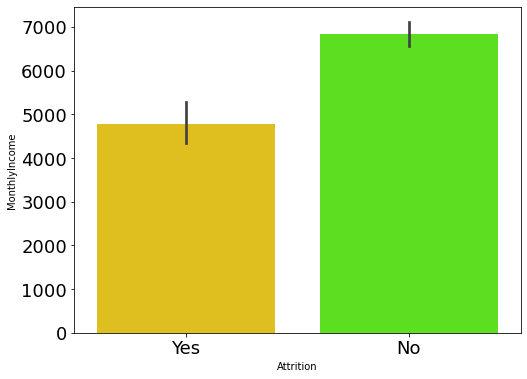

In [41]:
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='MonthlyIncome',data=df)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Comment:
The Attrition rate in the employees is less when the monthly income reaches to 6900.

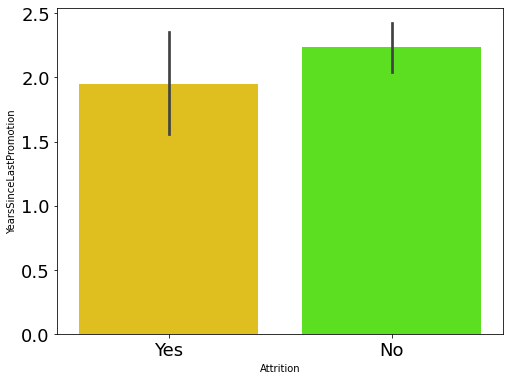

In [42]:
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='YearsSinceLastPromotion',data=df)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Comment:
The rate of Attrition is high when the employee did not got promoted since 1.8 years.

# Encoding categorical data

In [43]:
# Using Label Encoder on target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Attrition"] = le.fit_transform(df["Attrition"])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [44]:
# Droping unnecessary columns
df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)

In [45]:
df.shape

(1470, 31)

In [46]:
# Ordinal Encoding for ordinal variables
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

oe_col = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
df=ordinal_encode(df, oe_col)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2


# Outliers Detection and Removal

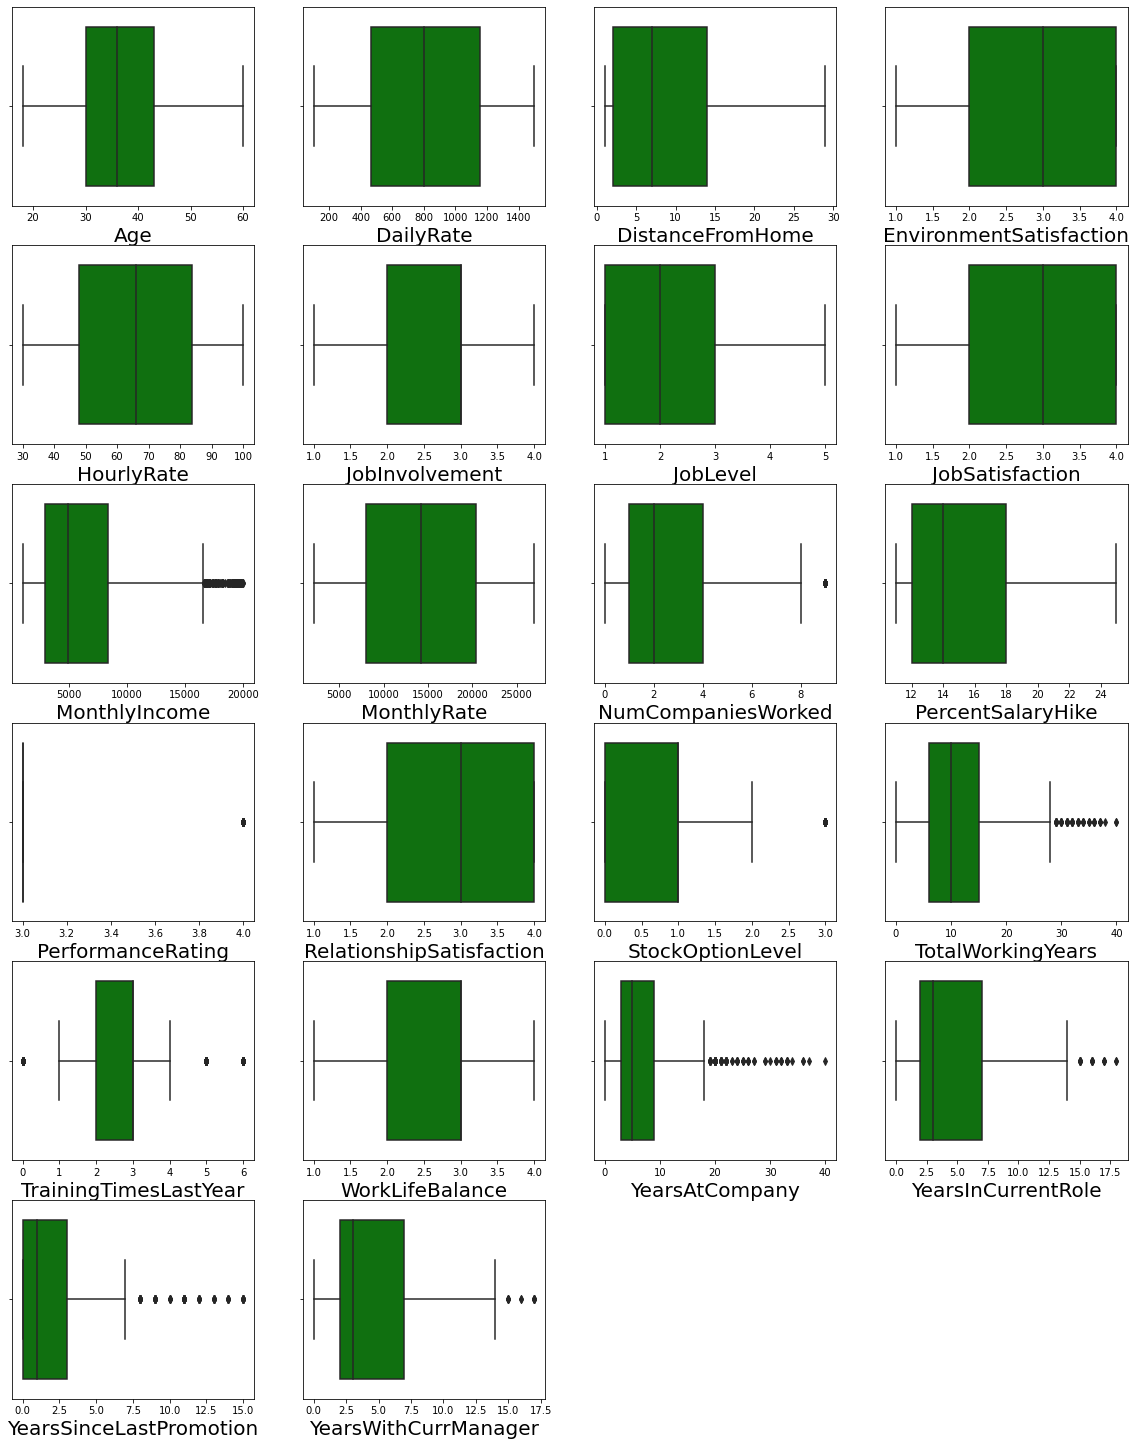

In [47]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numeric:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Comment:
1. Features containing outliers
"MonthlyIncome", "NumCompaniesWorked", "PerformanceRating", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager", "Attrition".

In [48]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (1470, 31)
Shape of the dataframe after removing outliers:  (1387, 31)
Percentage of data loss post outlier removal:  5.646258503401361


# Feature selection and Engineering

# 1. Skewness of features

In [49]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [50]:
# Splitting data in target and dependent feature
X = df.drop(['Attrition'], axis =1)
Y = df['Attrition']

# Transforming skew data using power transform

In [51]:
from sklearn.preprocessing import power_transform
df = power_transform(X)
df = pd.DataFrame(df, columns=X.columns)
df.skew()

Age                        -0.004079
BusinessTravel             -0.960583
DailyRate                  -0.199742
Department                  0.015095
DistanceFromHome           -0.008149
Education                  -0.103747
EducationField             -0.008642
EnvironmentSatisfaction    -0.205472
Gender                     -0.417296
HourlyRate                 -0.105678
JobInvolvement             -0.018801
JobLevel                    0.110769
JobRole                    -0.337641
JobSatisfaction            -0.217730
MaritalStatus              -0.158253
MonthlyIncome               0.027700
MonthlyRate                -0.176560
NumCompaniesWorked          0.016175
OverTime                    0.954751
PercentSalaryHike           0.112128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.191406
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.011133
YearsAtCompany             -0.025230
Y

Comment :
1. For Numeric features skewness is transform within permissible limit.
2. For ordinal features & categorical features skew parameter irrevalent.

In [52]:
#Correlation
df.corr()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.019607,0.019864,-0.036344,-0.025855,0.215520,-0.037564,0.013967,-0.037163,0.026203,...,NaN,0.037296,0.089449,0.652405,-0.014951,-0.016180,0.207538,0.145404,0.114162,0.142446
BusinessTravel,0.019607,1.000000,-0.001984,-0.003560,-0.007041,-0.006468,0.034658,0.004183,-0.011439,0.026364,...,NaN,-0.036165,-0.006092,0.027298,0.006192,-0.017977,-0.024021,-0.035610,-0.033148,-0.032665
DailyRate,0.019864,-0.001984,1.000000,-0.003546,-0.006034,-0.017504,0.040993,0.034324,-0.003271,0.015156,...,NaN,0.005771,0.049415,0.042750,0.005118,-0.046550,0.005391,0.022143,-0.035448,0.005908
Department,-0.036344,-0.003560,-0.003546,1.000000,0.037834,0.012780,0.082525,-0.013867,-0.030950,-0.000623,...,NaN,-0.037572,-0.000630,-0.006833,0.039938,0.017807,0.025457,0.057817,0.017699,0.024241
DistanceFromHome,-0.025855,-0.007041,-0.006034,0.037834,1.000000,0.002714,0.021074,-0.013409,0.010557,0.015607,...,NaN,0.009379,0.027082,-0.012129,-0.015334,-0.030011,0.006570,0.013091,-0.003873,-0.002310
Education,0.215520,-0.006468,-0.017504,0.012780,0.002714,1.000000,-0.038405,-0.026095,-0.017807,0.011105,...,NaN,-0.004863,0.025621,0.150720,-0.023039,0.010164,0.037921,0.051072,0.016076,0.026651
EducationField,-0.037564,0.034658,0.040993,0.082525,0.021074,-0.038405,1.000000,0.042609,0.005059,-0.004372,...,NaN,-0.018254,-0.012936,-0.001827,0.054321,0.034788,0.004483,0.004372,0.023062,0.028189
EnvironmentSatisfaction,0.013967,0.004183,0.034324,-0.013867,-0.013409,-0.026095,0.042609,1.000000,-0.014940,-0.042512,...,NaN,0.016892,0.024345,-0.013356,-0.018350,0.030422,0.012338,0.029218,0.038031,0.006417
Gender,-0.037163,-0.011439,-0.003271,-0.030950,0.010557,-0.017807,0.005059,-0.014940,1.000000,0.005618,...,NaN,0.041439,0.024390,-0.049776,-0.039213,0.002726,-0.046018,-0.028101,-0.016131,-0.027972
HourlyRate,0.026203,0.026364,0.015156,-0.000623,0.015607,0.011105,-0.004372,-0.042512,0.005618,1.000000,...,NaN,0.005207,0.041329,-0.012902,-0.018396,-0.013811,-0.032827,-0.035899,-0.062271,-0.022931


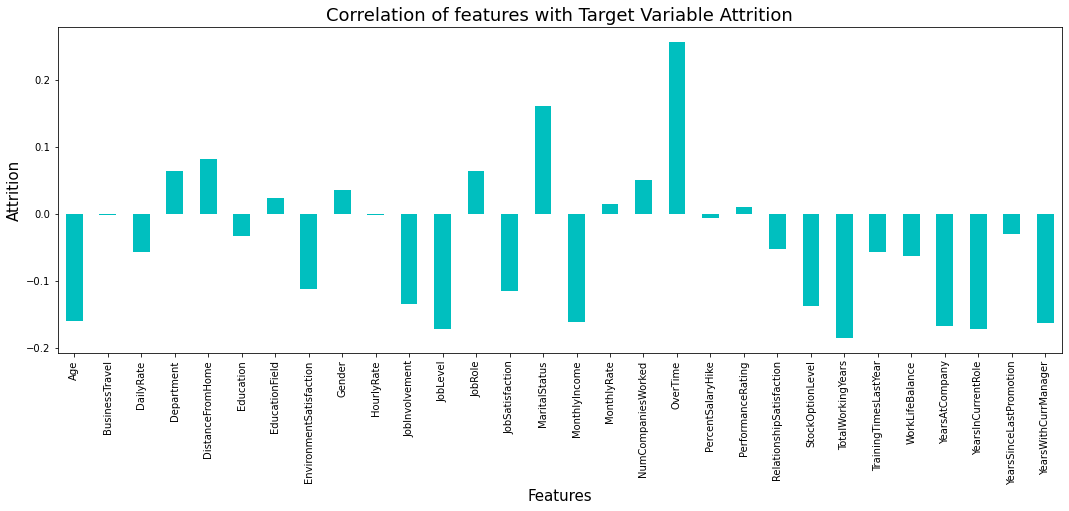

In [53]:
plt.figure(figsize = (18,6))
df1.corr()['Attrition'].drop(['Attrition']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Attrition',fontsize=15)
plt.title('Correlation of features with Target Variable Attrition',fontsize = 18)
plt.show()

Comment:
1. Age, JobLevel, MonthlyIncome is highly positively correlated with TotalWorkingYears.
2. JobLevel is highly positively correlated with the MonthlyIncome.
3. PercentSalaryHike is highly positively correlated with the column PerformanceRating.

#  Checking Multicollinearity between features using variance_inflation_factor

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,1.930457,Age
1,1.014314,BusinessTravel
2,1.025841,DailyRate
3,2.172093,Department
4,1.017385,DistanceFromHome
5,1.065266,Education
6,1.030480,EducationField
7,1.024396,EnvironmentSatisfaction
8,1.024366,Gender
9,1.024189,HourlyRate


Comment :
1. We can see that multicollinerity is within permissible limit of 10.

# Balancing using SMOTE
As data is Imbalanced in nature we will need to balance target variable.

In [55]:
from imblearn.over_sampling import SMOTE
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)
Y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

# Standard Scaling

In [56]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# PCA

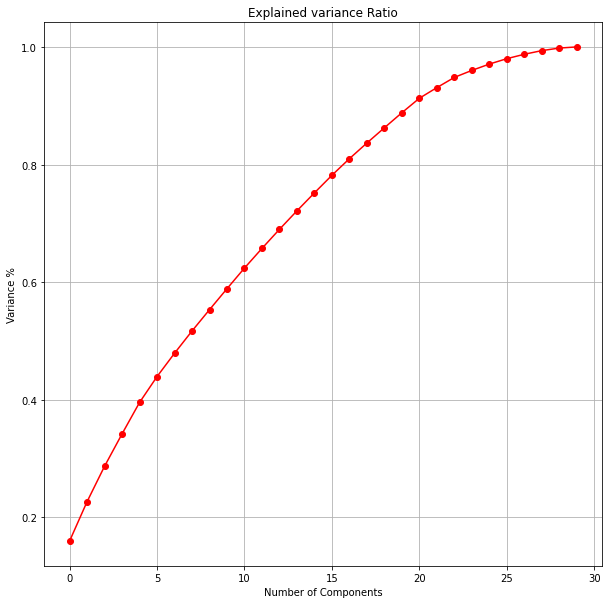

In [57]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

# Comment -
AS per the graph, we can see that 21 principal components attribute for 90% of variation in the data. We shall pick the first 21 components for our prediction

In [58]:
pca_new = PCA(n_components=21)
x_new = pca_new.fit_transform(X_scale)

In [59]:
principle_x=pd.DataFrame(x_new,columns=np.arange(21))

# Machine Learning Model Building

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.3)

# Linear Regression

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=217, test_size=.25)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print(y_pred)
print('\n')
print('\033[1m'+' Y-test :'+'\033[0m')
print(Y_test)

[ 7.03563287e-01  7.39840044e-01  4.05210976e-01  1.03414450e+00
  6.41027867e-01  3.72876386e-01  4.78927039e-01 -4.93088616e-02
  8.22729758e-01 -2.52373696e-01  7.65997573e-01  1.25514972e-01
  9.11232329e-01  8.47105766e-01  7.24299872e-01 -2.39421612e-02
  7.30824799e-01  3.23897242e-01  2.05092580e-01  7.63281226e-01
  5.31259292e-01 -1.78532659e-01  9.15370816e-01  9.54463307e-01
  2.02018049e-01  1.55244308e-01  1.02076449e-01  2.80790593e-01
  2.67682432e-01  7.50655542e-01  8.88302724e-02  2.50351448e-01
  5.45189065e-01  7.04778565e-01  5.63372946e-01  5.90078103e-01
  1.48581123e-02  2.72870060e-02 -4.71357361e-01 -3.62058139e-01
  1.45966520e-01  1.22246989e-01  1.00517970e+00  7.96767040e-01
  9.30648247e-01  1.03355558e+00  1.25489314e+00  8.61859703e-01
  5.03738938e-01  2.52810783e-01  5.36842248e-01  6.40081131e-01
  1.47870844e-01 -3.59964128e-03  4.69201750e-01  1.11391234e+00
  8.26941058e-01  8.85648596e-01  6.15515230e-01 -5.91557377e-02
  8.84247082e-01  5.69814

In [63]:
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
r2_score(Y_test,y_pred)

Mean absolute error : 0.292214766620466
Mean squared error : 0.13028319998936805
Root Mean Squared Error: 0.360947641617684


 R2 Score :


0.47879101831027293

 True Values Vs Predicted Value plot :


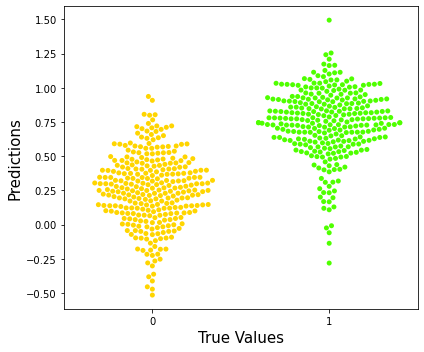

In [64]:
plt.figure(figsize=(6,5))
y_pred=lin_reg.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

In [65]:
rf = RandomForestRegressor(n_estimators = 250 ,max_depth=6)
svr=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
dtc = DecisionTreeRegressor(criterion='mse')
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor( max_depth=6,learning_rate=0.1)
ls= Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
rd=Ridge(alpha=1e-2, normalize=True)
xgb=XGBRegressor()
model = [rf,ls,rd,svr,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 



 Error of  RandomForestRegressor(max_depth=6, n_estimators=250) :
Mean absolute error : 0.24859832539074855
Mean squared error : 0.10739232865963191
Root Mean Squared Error: 0.327707687825037


 R2 Score :
0.5703678888257038


 Error of  Lasso(alpha=0.01, max_iter=100000.0, normalize=True) :
Mean absolute error : 0.5000243605843756
Mean squared error : 0.2500284206817715
Root Mean Squared Error: 0.5000284198740823


 R2 Score :
-0.00025988421892853


 Error of  Ridge(alpha=0.01, normalize=True) :
Mean absolute error : 0.2928579222534533
Mean squared error : 0.13026528885050742
Root Mean Squared Error: 0.3609228294947653


 R2 Score :
0.47886267333906574


 Error of  SVR(epsilon=0.2, gamma='auto', kernel='poly') :
Mean absolute error : 0.2931746029561549
Mean squared error : 0.14833362628378594
Root Mean Squared Error: 0.38514104725903464


 R2 Score :
0.40657875833548895


 Error of  DecisionTreeRegressor(criterion='mse') :
Mean absolute error : 0.18998272884283246
Mean squared error

# We can clearly see that GradientBoostingRegressor's R2 score is 65.9%.We will do hyperparameter tuning on this.

In [66]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 251, 10),
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'subsample': [0.8, 0.9, 1.0]
}

# Create Gradient Boosting Regressor model
grabd = GradientBoostingRegressor()

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(
    grabd, param_distributions=param_dist, n_iter=100,
    scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42
)

# Fit the model
random_search.fit(X_train, Y_train)

# Get best hyperparameters
best_params = random_search.best_params_

# Evaluate on test set
best_model = random_search.best_estimator_
test_predictions = best_model.predict(X_test)
test_mse = np.mean((test_predictions - Y_test)**2)

print("Best Hyperparameters:", best_params)
print("Test Mean Squared Error:", test_mse)

Best Hyperparameters: {'subsample': 0.9, 'n_estimators': 240, 'min_samples_split': 10, 'min_samples_leaf': 9, 'max_depth': 5, 'learning_rate': 0.1}
Test Mean Squared Error: 0.0797025196704129


# Final model

In [84]:
final_model=GradientBoostingRegressor(subsample= 0.9, 
                                      n_estimators= 249,
                                      min_samples_split= 11, 
                                      min_samples_leaf= 11, 
                                      max_depth= 12,
                                      learning_rate= 0.1)
final_model.fit(X_train,Y_train)
y_pred=final_model.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.18634004359856904
Mean squared error : 0.07404389773324117
Root Mean Squared Error: 0.2721100838507114


 R2 Score of Final Model :
0.7037811126758453




#    Here we did not use the all best params ,because there were no visible change in R2 score,So just using trial method we changed the value of some parameters and improved the accuracy

# Saving the model

In [85]:
import joblib
joblib.dump(final_model,'HRAttrition_Final.pkl')

['HRAttrition_Final.pkl']